# K-Means Clustering

In [207]:
import numpy as np
import matplotlib.pyplot as plt
print("Libraries imported")

Libraries imported


## Model Arcitecture

In [208]:
class KMeans:

    def __init__(self, k: int, max_iters: int = 100) -> None:
        self.k = k
        self.max_iters = max_iters
        self.centroids = None
        self.labels = None
        self.inertia = None


    def fit(self, X: np.ndarray) -> None:
        self.centroids = X[np.random.choice(a=X.shape[0], size=self.k, replace=False)]

        for i in range(self.max_iters):
            self.inertia = 0
            assigned_clusters = []

            for x in X:
                distances = np.sqrt(np.sum((x - self.centroids)**2, axis=1))
                assigned_clusters.append(np.argmin(distances))

            new_centroids = []
            for k in range(self.k):
                # k_cluster_data = X[np.array(assigned_clusters) == k]
                k_cluster_data = X[np.where(np.array(assigned_clusters) == k)]
                new_centroids.append(np.mean(k_cluster_data, axis=0))

                for x in k_cluster_data:
                    self.inertia += np.sum((x - self.centroids[k])**2)

            if np.array_equal(self.centroids, new_centroids):
                break

            self.centroids = new_centroids

        self.labels = assigned_clusters

    def predict(self, X):
        predictions = []
        for x in X:
            distances = np.sqrt(np.sum((x - self.centroids)**2, axis=1))
            predictions.append(np.argmin(distances))
        return predictions
                

## Dataset

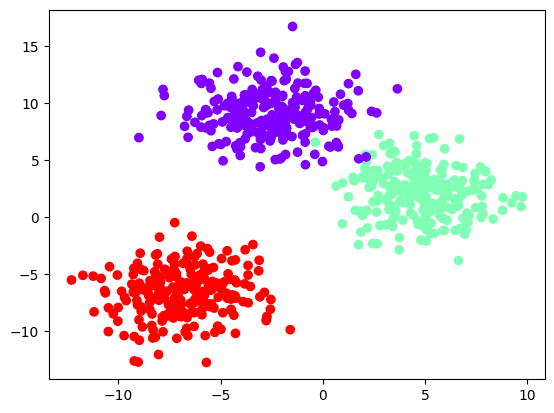

In [209]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

# Generate data
X, y = make_blobs(n_samples=1000, centers=3, n_features=2, random_state=42, cluster_std=2)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='rainbow')


In [210]:
# for 3D plot
# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')  # Specify 3D projection

# ax.scatter(X_train[:, 0], X_train[:, 1], X_train[:, 2], c=y_train, cmap='rainbow') 

## Model Training

In [211]:
kmeans = KMeans(k=3)
kmeans.fit(X)
print(kmeans.labels)

[0, 0, 2, 1, 1, 0, 2, 2, 2, 2, 1, 0, 1, 2, 2, 2, 1, 1, 1, 1, 2, 0, 0, 0, 2, 1, 1, 1, 2, 2, 0, 0, 2, 1, 1, 0, 0, 2, 0, 0, 1, 2, 1, 0, 1, 0, 1, 1, 0, 2, 0, 1, 2, 0, 1, 0, 1, 1, 1, 2, 2, 1, 0, 0, 1, 1, 0, 2, 2, 1, 0, 1, 2, 2, 2, 0, 2, 1, 1, 1, 2, 1, 1, 1, 2, 0, 2, 0, 1, 1, 1, 1, 2, 2, 0, 2, 0, 1, 2, 2, 2, 0, 0, 1, 0, 2, 2, 1, 2, 1, 0, 2, 2, 2, 1, 2, 0, 0, 2, 1, 1, 2, 0, 2, 0, 0, 2, 0, 2, 2, 1, 2, 2, 0, 1, 0, 1, 2, 2, 2, 1, 1, 0, 0, 0, 1, 2, 1, 1, 1, 1, 0, 2, 0, 1, 2, 1, 2, 1, 0, 2, 1, 1, 2, 1, 1, 2, 2, 0, 0, 2, 1, 1, 2, 1, 0, 2, 0, 2, 0, 1, 2, 1, 2, 1, 0, 1, 0, 1, 0, 2, 1, 2, 2, 1, 0, 2, 2, 2, 0, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 2, 0, 0, 2, 2, 1, 0, 1, 0, 2, 0, 0, 2, 1, 0, 1, 1, 2, 0, 1, 1, 0, 1, 0, 2, 2, 0, 2, 0, 2, 0, 0, 0, 2, 0, 1, 2, 1, 2, 1, 2, 2, 0, 2, 1, 2, 1, 2, 2, 2, 2, 1, 0, 2, 0, 0, 2, 1, 1, 0, 2, 2, 2, 2, 1, 0, 1, 0, 0, 2, 0, 2, 0, 2, 2, 1, 1, 2, 1, 0, 0, 1, 2, 2, 0, 1, 2, 0, 0, 1, 0, 0, 2, 0, 1, 2, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 2, 1, 0, 0, 2, 0, 0, 2, 0, 2, 1, 2, 1, 2, 2, 2, 0, 

## Model Evaluation

In [212]:
from sklearn.metrics import silhouette_score
preds = kmeans.predict(X_test)
inertia = kmeans.inertia
sil_score = silhouette_score(X_test, preds)
print("Inertia: ", inertia)
print("Silhouette Score: ", sil_score)

Inertia:  7727.112280523751
Silhouette Score:  0.6961476529789709


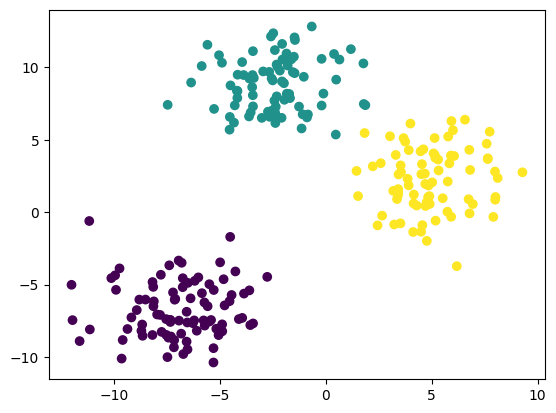

In [213]:
plt.scatter(X_test[:, 0], X_test[:, 1], c=preds)

## K-Elbow Method

Text(0, 0.5, 'Inertia')

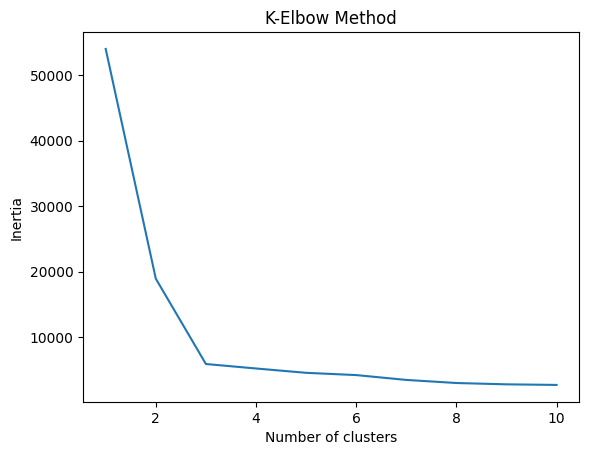

In [214]:
inertias = []
max_k = 10

for k in range(1, max_k + 1):
    kmeans = KMeans(k=k)
    kmeans.fit(X_train)
    inertias.append(kmeans.inertia)

plt.plot(range(1, max_k+1), inertias)
plt.title('K-Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')